# Assignment 2
### Understanding Uncertainty
### Due 9/12

In [3]:
#Download Data
import urllib.request
import os

def download_data(force=False):
    """Download and extract course data from Zenodo."""
    import urllib.request
    import zipfile
    import os
    
    zip_path = 'data.zip'
    data_dir = 'data'
    
    if not os.path.exists(zip_path) or force:
        print("Downloading course data...")
        urllib.request.urlretrieve(
            'https://zenodo.org/records/16954427/files/data.zip?download=1',
            zip_path
        )
        print("Download complete")
    
    if not os.path.exists(data_dir):
        print("Extracting data files...")
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.extractall(data_dir)
        print("Data extracted")
    
    return data_dir

download_data()

Download complete
Extracting data files...
Data extracted


'data'

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns

1. 'State Bottle Retail' is the price at which the bottle is sold, while 'State Bottle Cost' is the price the state pays for a bottle.
- How do you define the most profitable item? Why? Explain your thinking.
- Use `.groupby` calculations to determine the most profitable liquors sold in Iowa.
- Make a plot of the top liquors.

<Axes: xlabel='Profitability', ylabel='Item Description'>

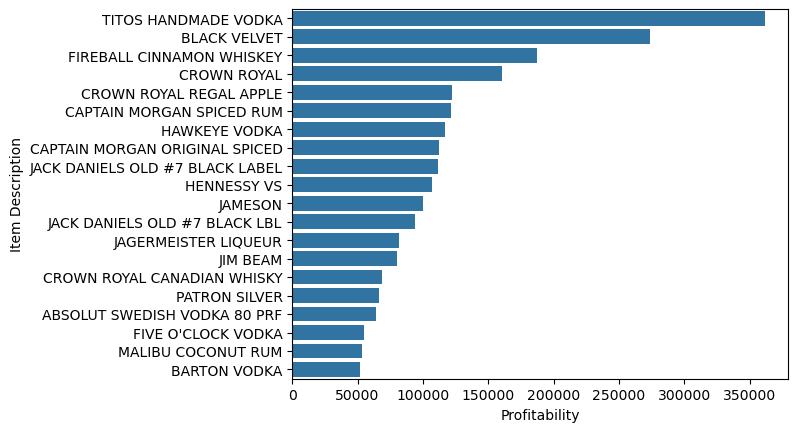

In [11]:
# I would define the most profitable item as the item with the highest sales relative to its cost. This is because the item
# with the highest sales will produce the most revenue and the cost will be how much it costs to purchase it. If the relative cost is small and the sales
# are high, then the item is most profitable.
liquor_data = pd.read_csv("data/iowa.csv")


profitability = (liquor_data.loc[:,['Item Description','Sale (Dollars)', 'State Bottle Cost', 'Bottles Sold']]
         .assign(Total_Cost=lambda df: df['State Bottle Cost'] * df['Bottles Sold'])
         .groupby('Item Description', as_index=False)
         .agg({'Sale (Dollars)': 'sum', 'Total_Cost': 'sum'})
         .assign(Profitability=lambda df: df['Sale (Dollars)'] - df['Total_Cost'])
         .sort_values(by='Profitability',ascending=False))
top_prof = profitability[:20]
sns.barplot(data=top_prof, x='Profitability', y='Item Description', orient='h')


I stated that the most profitable item would be the item with the highest sale yield and the lowest total  cost which according to this plot is actually Titos Vodka


2. This question is to further explore broadcasting in NumPy.

- In the first code chunk below, there are two vectors, $x$ and $y$. What happens when you try to subtract them?
- Instead, try `x.reshape(-1,1)-y.reshape(1,-1)`. What do you get?
- Try `x.reshape(1,-1)-y.reshape(-1,1)`. Compare the results to your previous answer.
- Write two double for-loops to replicate the results of the previous two answers. 
- Clearly explain how `x.reshape(1,-1)` and `x.reshape(-1,1)` change $x$

In [12]:
import numpy as np

x = np.array([1,3,5])
y = np.array([2,5])

In [ ]:
# A value error happens when I try to subtract them. I tried both ways.
p1 = x - y

ValueError: operands could not be broadcast together with shapes (3,) (2,) 

In [17]:
#This works as it subtracts them properly with the correct array sizes.
p2 = x.reshape(-1,1) - y.reshape(1,-1)
p2

array([[-1, -4],
       [ 1, -2],
       [ 3,  0]])

In [18]:
#this array is the transpose of the previous answer.
p3 = x.reshape(1,-1) - y.reshape(-1,1)
p3

array([[-1,  1,  3],
       [-4, -2,  0]])

In [19]:
p2_same = []
for i in x:
    a = []
    for j in y:
        a.append(i-j)
    p2_same.append(a)
p2_same = np.array(p2_same)
p2_same


array([[-1, -4],
       [ 1, -2],
       [ 3,  0]])

In [20]:
p3_same = []
for i in y:
    a = []
    for j in x:
        a.append(i-j)
    p3_same.append(a)
p3_same = np.array(p3_same)
p3_same

array([[ 1, -1, -3],
       [ 4,  2,  0]])

### Explanation
The reshape(-1, 1) basically makes an array a vertical 2d array(column) and allows the final shape to be 3x2. I showed that in the for loops by reading in x as the outer loop. reshape(1, -1) does the opposite and flattens the array(row vector) allowing the final shape to be 2x3. In this context they allow the values to be subtracted by making them the same shapes.

3. The indicator function $\mathbb{I}\{ x \le z \}$ takes the value 0 if $x>z$ and 1 if $x \le z$ is true, or
$$
\mathbb{I}\{x \le z\} = \begin{cases}
0, &x > z \\
1, &x \le z
\end{cases}
$$

- For $x = 3$, plot the indicator function for any $z$
- Explain how $ 1- \mathbb{I}\{ x \le z \} = \mathbb{I}\{ x > z \}$. Drawing a plot might help, or looking at the definition given above.
- The code below generates a random sample for different numbers of observations, $N = 3, 30, 300, 3000 $. Write a function to compute the ECDF curve for each sample, and plot your results.
- Describe in your own words what happens to the ECDF qualitatively as the sample size $N$ increases

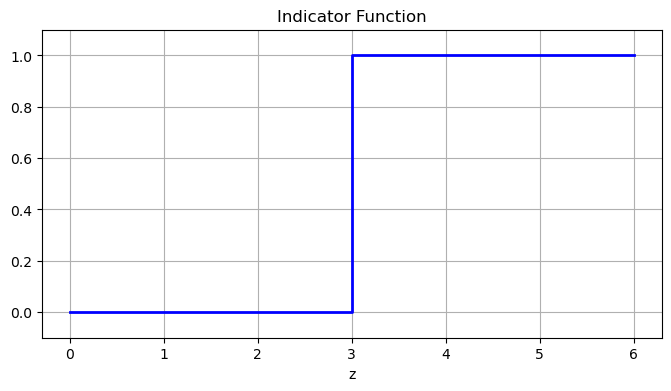

In [32]:
import matplotlib.pyplot as plt
# Set x
x = 3

# Create a range of z values
z = np.linspace(0, 6, 500)

# Compute indicator function I{x <= z}
indicator = np.where(x <= z, 1, 0)

# Plot
plt.figure(figsize=(8,4))
plt.step(z, indicator, where='post', color='blue', linewidth=2)
plt.xlabel('z')
plt.title('Indicator Function')
plt.ylim(-0.1, 1.1)
plt.grid(True)
plt.show()

$ 1- \mathbb{I}\{ x \le z \} = \mathbb{I}\{ x > z \}$ because the values the indicator function can take for a given x is either 1 or 0. Because of this and because x <= z and x>z rules are opposite, when one is 0 the other is 1. This means subtracting the output of the function from 1 will always lead to the result of the opposite rule.

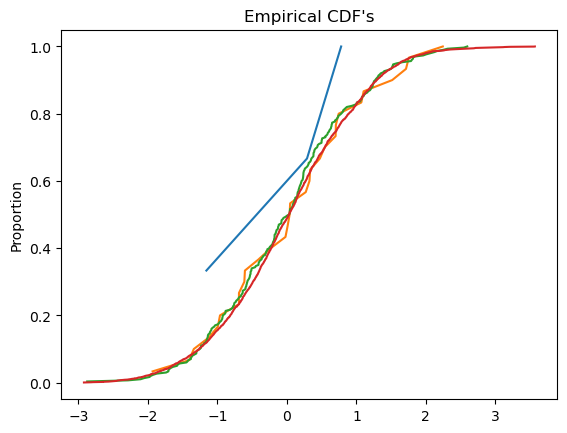

In [53]:
import numpy as np
import seaborn as sns


rng = np.random.default_rng(100)

def ecdf(x, plot=True):
    Z = np.sort(np.unique(x)) # Extract and sort unique values for x
    compare = x.reshape(-1,1) <= Z.reshape(1,-1)

    ecdf = np.mean(compare,axis=0) # Average over x indices for each z
    

    if plot:
        # Plot the ecdf:
        plt.plot(Z,ecdf)
        plt.title(f"Empirical CDF's")
        plt.ylabel('Proportion')
        # plt.step(grid, where='post', label=f'N={N}')
        # plt.legend()

    return ecdf, Z


for N in (3,30,300,3000):
    X = rng.normal(0,1,N)
    # ECDF plot goes here:
    F_hat, grid = ecdf(X, N)



As the sample size N increases the line becomes smoother and it is easier to see the curve. The more jagged lines in this graph are the smaller N's and you can see how the step function struggles to keep the line smooth with the smaller N values.

4. A **quantile** generalizes the concept of the median so that instead of 50% of the mass below and 50% above, the $q$-quantile is the value for which $q$ proportion of the data are below that value and $(1-q)$ proportion of the data are above that value. This is a concept of **order**.

- Write a function that computes any quantile without using Numpy's `np.quantile`
- Write a function that computes the **Interquartile Range (IQR)** -- the .25 quantile and the .75 quantile, which brackets 50% of the data -- and the **whiskers**: $\pm 1.5 \times \text{IQR}$ from the edges of the IQR
- Write a function that computes a five-number summary and values for a boxplot: the minimum, the .25 quantile, the median, the .75 quantile, and the maximum, and the whiskers
- Anything outside the whiskers is an **outlier**; write a function that returns a Boolean vector indicating if the observations are outliers.
- For a numeric variable of your choice from one of the datasets, apply your functions from above, and compare your answers with `sns.boxplot` and `df.describe`. 

Custom Five-Number Summary:
Lower whisker: 327.41999999999996
Upper whisker: -138.01999999999995
Q1: 36.52
Median: 78.65
Q3: 152.88
Min: -1628.4
Max: 36720.0
Number of outliers: 0


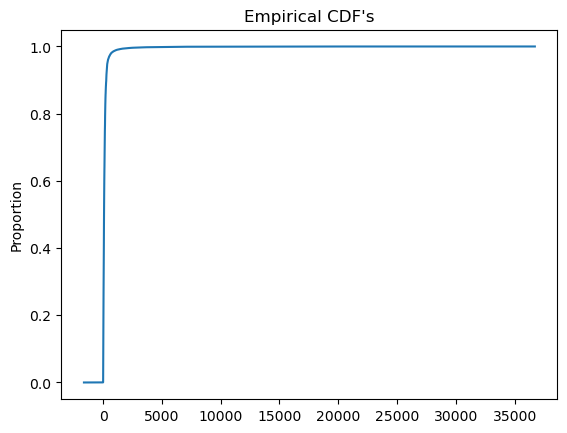

In [57]:
def compute_quantile(F_hat, q, z):
    dist = (F_hat-q) ** 2 # Compute squared distance of F_hat from .5
    indices = np.where( dist == dist.min() ) # Find the indices closest to 1/2
    quantile = np.mean(z[indices])
    return quantile

def compute_IQR_whiskers(F_hat,z):
    q1 = compute_quantile(F_hat, .25, z)
    q3 = compute_quantile(F_hat, .75, z)
    IQR = q3 - q1
    whisker_1 = (IQR * 1.5) + q3
    whisker_2 = q1 - (IQR * 1.5)
    return IQR, whisker_1, whisker_2

def five_num_summary(F_hat, z):
    IQR, whisker_1, whisker_2 = compute_IQR_whiskers(F_hat,z)
    q1 = compute_quantile(F_hat, .25, z)
    q3 = compute_quantile(F_hat, .75, z)
    median = compute_quantile(F_hat, .5, z)
    min = compute_quantile(F_hat, 0, z)
    max = compute_quantile(F_hat, 1, z)
    return whisker_1, whisker_2, q1, median, q3, min, max

def is_outlier(F_hat, z):
    _, whisker_1, whisker_2 = compute_IQR_whiskers(F_hat,z)
    return (F_hat > whisker_1) | (F_hat < whisker_2)

F_hat, z = ecdf(np.asarray(liquor_data["Sale (Dollars)"]))
w1, w2, q1, median, q3, min, max = five_num_summary(F_hat, z)
outliers = is_outlier(F_hat, z)

print("Custom Five-Number Summary:")
print(f"Lower whisker: {w1}")
print(f"Upper whisker: {w2}")
print(f"Q1: {q1}")
print(f"Median: {median}")
print(f"Q3: {q3}")
print(f"Min: {min}")
print(f"Max: {max}")
print(f"Number of outliers: {outliers.sum()}")

In [58]:
print("\nPandas describe():")
print(liquor_data["Sale (Dollars)"].describe())



Pandas describe():
count    159904.000000
mean        146.931598
std         459.368723
min       -1628.400000
25%          36.550000
50%          78.660000
75%         152.880000
max       36720.000000
Name: Sale (Dollars), dtype: float64


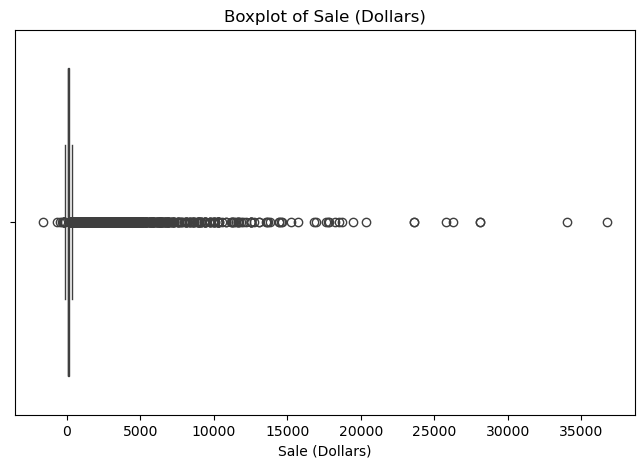

In [59]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=liquor_data["Sale (Dollars)"])
plt.title("Boxplot of Sale (Dollars)")
plt.show()

5. The kernel density estimator captures the concentration of the data around various points, and is defined as
$$
\hat{f}_{N,h}(z) = \frac{1}{N} \sum_{i=1}^N \frac{1}{h} k \left( \frac{x_i - z}{h}\right)
$$
where $h$ is the bandwidth and $k()$ is one of the kernel functions from the class materials (Gaussian, Epanechnikov, uniform, triangular).

- Write a function that takes the bandwidth $h$ as given, and computes and plots $\hat{f}_{N,h}(z)$, for the kernels listed in the slides
- Write a function that computes the plug-in bandwidth
- Use your functions to analyze some numeric variables from a dataset of your choice, using a variety of bandwidths
- Compare bandwidths that are greater or less than the plug-in value with the results for the plug-in value. When does the KDE appear to be overfitting? Underfitting?